In [1]:
import pandas as pd
import numpy as np

import json

np.__version__

'1.19.5'

# Load & prep data

In [2]:
df = pd.read_csv('./data/9-OUTPUT-viz-ready.csv')
df

,Unnamed: 0,song_id,performer,song,generic_genre,lyric_line,chart_debut,x,y,chart_debut_date_normalized_0_to_1,genre_position_band,similar_lyric_that_came_before_indices,similar_lyric_that_came_after_indices,num_before,num_after,the_index,num_before_song_avg,num_after_song_avg
0,0,#9 DreamJohn Lennon,John Lennon,#9 Dream,ROCK,So long ago,1974-12-21,62.357605,41.475302,25.450,10.0,"[140563, 140542, 93272, 60697, 116259, 166198,...","[105020, 146932, 79484, 73894, 103160]",9,5,0,1.291667,2.541667
1,1,#9 DreamJohn Lennon,John Lennon,#9 Dream,ROCK,"Was it in a dream, was it just a dream?",1974-12-21,55.684884,27.032071,25.450,10.0,"[127890, 139008, 75764, 143437]","[8608, 53329, 76150, 86708, 137813, 76135, 120...",4,10,1,1.291667,2.541667
2,2,#9 DreamJohn Lennon,John Lennon,#9 Dream,ROCK,"I know, yes I know",1974-12-21,69.964586,46.613546,25.450,10.0,[],[],0,0,2,1.291667,2.541667
3,3,#9 DreamJohn Lennon,John Lennon,#9 Dream,ROCK,"Seemed so very real, it seemed so real to me",1974-12-21,60.181471,69.527274,25.450,10.0,[],"[42847, 97547, 101722, 119746, 104908, 119764,...",0,14,3,1.291667,2.541667
4,4,#9 DreamJohn Lennon,John Lennon,#9 Dream,ROCK,Took a walk down the street,1974-12-21,49.938720,41.965371,25.450,10.0,[],[],0,0,4,1.291667,2.541667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
167355,167355,pride.is.the.devilJ. Cole & Lil Baby,J. Cole & Lil Baby,pride.is.the.devil,HIP_HOP,"I'm addicted to promethazine, it's crazy, yeah...",2021-05-29,41.610927,50.449968,97.562,20.0,[],[],0,0,167355,1.694915,0.033898
167356,167356,pride.is.the.devilJ. Cole & Lil Baby,J. Cole & Lil Baby,pride.is.the.devil,HIP_HOP,"All this money coming in, it drive me crazy no...",2021-05-29,45.775471,52.982471,97.562,20.0,[],[],0,0,167356,1.694915,0.033898
167357,167357,pride.is.the.devilJ. Cole & Lil Baby,J. Cole & Lil Baby,pride.is.the.devil,HIP_HOP,I'll be crazy if I blow it,2021-05-29,45.995316,47.344963,97.562,20.0,"[15842, 26791, 50160, 73582, 73597]",[],5,0,167357,1.694915,0.033898
167358,167358,pride.is.the.devilJ. Cole & Lil Baby,J. Cole & Lil Baby,pride.is.the.devil,HIP_HOP,And it left so many R.I.P.,2021-05-29,57.715991,46.589529,97.562,20.0,[],[],0,0,167358,1.694915,0.033898


In [3]:
total_count = df.num_before + df.num_after
total_count

0         14
1         14
2          0
3         14
4          0
          ..
167355     0
167356     0
167357     5
167358     0
167359     6
Length: 167360, dtype: int64

In [4]:
viz_ready = df.drop(columns=[
    'similar_lyric_that_came_before_indices','similar_lyric_that_came_after_indices','num_before','num_after',
    'Unnamed: 0', 'the_index', 'num_before_song_avg', 'num_after_song_avg',
    'song_id'
]).copy()

viz_ready['near_neighbors_count'] = total_count
viz_ready

,performer,song,generic_genre,lyric_line,chart_debut,x,y,chart_debut_date_normalized_0_to_1,genre_position_band,near_neighbors_count
0,John Lennon,#9 Dream,ROCK,So long ago,1974-12-21,62.357605,41.475302,25.450,10.0,14
1,John Lennon,#9 Dream,ROCK,"Was it in a dream, was it just a dream?",1974-12-21,55.684884,27.032071,25.450,10.0,14
2,John Lennon,#9 Dream,ROCK,"I know, yes I know",1974-12-21,69.964586,46.613546,25.450,10.0,0
3,John Lennon,#9 Dream,ROCK,"Seemed so very real, it seemed so real to me",1974-12-21,60.181471,69.527274,25.450,10.0,14
4,John Lennon,#9 Dream,ROCK,Took a walk down the street,1974-12-21,49.938720,41.965371,25.450,10.0,0
...,...,...,...,...,...,...,...,...,...,...
167355,J. Cole & Lil Baby,pride.is.the.devil,HIP_HOP,"I'm addicted to promethazine, it's crazy, yeah...",2021-05-29,41.610927,50.449968,97.562,20.0,0
167356,J. Cole & Lil Baby,pride.is.the.devil,HIP_HOP,"All this money coming in, it drive me crazy no...",2021-05-29,45.775471,52.982471,97.562,20.0,0
167357,J. Cole & Lil Baby,pride.is.the.devil,HIP_HOP,I'll be crazy if I blow it,2021-05-29,45.995316,47.344963,97.562,20.0,5
167358,J. Cole & Lil Baby,pride.is.the.devil,HIP_HOP,And it left so many R.I.P.,2021-05-29,57.715991,46.589529,97.562,20.0,0


# Export it

In [5]:
# viz_ready.to_csv('./data/10-OUTPUT-viz-ready.csv')


# Look at popularity over time

In [6]:
viz_ready

,performer,song,generic_genre,lyric_line,chart_debut,x,y,chart_debut_date_normalized_0_to_1,genre_position_band,near_neighbors_count
0,John Lennon,#9 Dream,ROCK,So long ago,1974-12-21,62.357605,41.475302,25.450,10.0,14
1,John Lennon,#9 Dream,ROCK,"Was it in a dream, was it just a dream?",1974-12-21,55.684884,27.032071,25.450,10.0,14
2,John Lennon,#9 Dream,ROCK,"I know, yes I know",1974-12-21,69.964586,46.613546,25.450,10.0,0
3,John Lennon,#9 Dream,ROCK,"Seemed so very real, it seemed so real to me",1974-12-21,60.181471,69.527274,25.450,10.0,14
4,John Lennon,#9 Dream,ROCK,Took a walk down the street,1974-12-21,49.938720,41.965371,25.450,10.0,0
...,...,...,...,...,...,...,...,...,...,...
167355,J. Cole & Lil Baby,pride.is.the.devil,HIP_HOP,"I'm addicted to promethazine, it's crazy, yeah...",2021-05-29,41.610927,50.449968,97.562,20.0,0
167356,J. Cole & Lil Baby,pride.is.the.devil,HIP_HOP,"All this money coming in, it drive me crazy no...",2021-05-29,45.775471,52.982471,97.562,20.0,0
167357,J. Cole & Lil Baby,pride.is.the.devil,HIP_HOP,I'll be crazy if I blow it,2021-05-29,45.995316,47.344963,97.562,20.0,5
167358,J. Cole & Lil Baby,pride.is.the.devil,HIP_HOP,And it left so many R.I.P.,2021-05-29,57.715991,46.589529,97.562,20.0,0


In [7]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [8]:
def viz_bbox(viz_ready, bbox):
    filtered_to_bbox = viz_ready[
        (viz_ready.x > bbox['x'][0]) &
        (viz_ready.x < bbox['x'][1]) &

        (viz_ready.y > bbox['y'][0]) &
        (viz_ready.y < bbox['y'][1])
    ]
    sns.distplot(filtered_to_bbox.chart_debut_date_normalized_0_to_1, bins=45, )
    plt.gca().set_xlim([0, 100])

    plt.show()

/Users/dmora/.virtualenvs/jupyter3.7/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


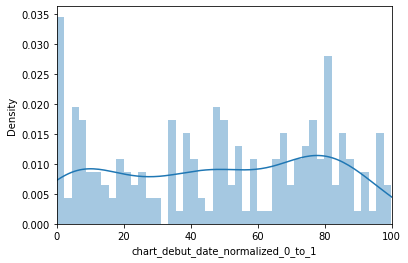

In [12]:
# unclear if any change
endearments = {"x":[68.41437686488501,70.60785278424815],"y":[37.41337593941116,38.656998447264364]}
hope = {"x":[63.82054821612978,64.7455660983335],"y":[34.10020481305155,34.62465691590811]}
king_and_queen = {"x":[37.16232335742171,39.00723683780778],"y":[47.32136770032542,48.36736775393717]}
this_topic_does_not_matter = {"x":[69.40281662040354,70.7281775003339],"y":[55.34667073773606,56.09810302233943]}

# increases
money = {"x":[44.373966474543344,46.89578417179803],"y":[51.32652039574649,53.620313395218965]}
bling = {"x":[36.830222358561755,38.98558104895179],"y":[50.51323309248308,52.473702590635526]}


# decrease
trains = {"x":[33.81003871731829,35.12548575198946],"y":[44.21206344977864,44.95787493818595]}
mail_letters = {"x":[75.49889146108401,78.36359380070401],"y":[51.102477133812194,52.72666104957888]}
crying = {"x":[47.221939675414774,51.22855843986578],"y":[63.95499696143897,66.2266067073554]}
smooching = {"x":[42.29274375515004,46.38922509120185],"y":[58.50912291912832,60.83168153376482]}

# flashes
the_twist = {"x":[43.44424212685903,45.81103037181394],"y":[27.42601396768172,29.578795397291564]}


# peaks
apology = {"x":[74.22341143872275,76.60246085972018],"y":[54.42211974817969,55.770955803834475]}
lonesomeness = {"x":[46.83177410717391,51.25894554602522],"y":[60.27980592534157,62.78985401790457]}
summer = {"x":[38.33223185597551,39.937022657569045],"y":[56.732321042928035,57.64218011347436]}
heart_and_soul = {"x":[51.29575376990074,54.630406727410495],"y":[63.39077685082963,66.42390792050726]}
heaven = {"x":[41.952352805865246,44.28253666093067],"y":[62.549830960924254,64.66931779776084]}
freedom = {"x":[48.863729693018406,50.7200475836808],"y":[57.927640223430984,59.61610842120449]} # sudden drop
american_south = {"x":[40.30689751115798,41.25062601956011],"y":[40.768192046759836,41.626587896837336]} # has gap
love_lagoon = {"x":[56.88552518777873,67.59223863239565],"y":[57.13397513383038,66.87257930547837]}


viz_bbox(viz_ready, king_and_queen)

# La dee da...

# ... de la dee!